In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

47.59914626472184 -71.68850395252541
72.18332622549056 -29.996593178216216
-76.34694300868729 -174.2745710482168
-12.566448432321351 -113.93537257184782
34.50904111567989 93.12119245665542
-11.145179011856612 56.12756336513266
-35.09740021911948 -179.61732440411987
-67.18478582823087 144.7516631798157
2.204782032736503 -91.6179986844539
-81.63551612957596 98.77599548023278
87.33135382230137 -154.21219503640842
21.328856057044433 -86.60604412318054
54.83327506249154 -49.67190101774341
-16.59735684217908 -146.39316295742776
-1.0434584169942411 -121.53926174872296
-45.55271689781115 -131.66428763206676
-38.03976135942429 -17.177464954003483
34.436157128684755 -91.99326164823543
-63.10500975926472 16.450606856220418
-79.27279041897424 113.8464956255396
34.04026814145932 7.598567845438936
12.481539514923071 21.53930262222582
-72.9891720892559 -49.058332261399556
-25.274629039584653 -17.455495324981598
50.29929920661718 -120.52772039228694
20.534081902262045 -64.67195197218885
62.38644165475

-1.6745147804758602 168.73577793857572
-1.351339614217622 -169.574749807253
65.71538719588864 48.84953137336947
19.432189322213688 92.90084836624919
-28.73642174649889 -19.144289770675982
29.9616091767176 -73.89033500067877
33.70230142602122 -129.80469652644373
-39.51012264567598 96.53215745383068
55.915893593468155 -75.44578011035041
-77.92177965069915 5.737211464215164
-39.71269832067739 50.954736934550226
17.011174812133703 5.034380787006398
56.91488446808685 127.56739442464288
4.061416754249862 151.91760694004768
66.71099857188403 -61.268765122187745
31.12738646713106 23.26706769439525
13.860985531262884 -31.563740169702243
-18.85681694560286 -102.19298804642409
-61.3452631729241 44.51287067047781
56.92073307197393 -57.21792057245945
4.300355611096705 -24.39839249642864
-76.07463708553506 115.13144179775469
37.43740048508815 -42.11229311674026
-23.17903655601954 135.2640062838135
64.1096141416424 34.0835940102273
-20.649956090725595 53.100592506320595
82.64734562123621 43.690613493

In [14]:
from citipy import citipy

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


608

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d49fafd11cc42c8de5b4c086c421e9fe


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-raymond
Processing Record 2 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | lasa
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | isla mujeres
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | tautira
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | pine bluff
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | naftah
City not found. Skipping...
Processing Record 19 of Set 1 | adre
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | merritt
Processing Record 22 of Se

Processing Record 36 of Set 4 | severnoye
Processing Record 37 of Set 4 | sambava
Processing Record 38 of Set 4 | sovetskiy
Processing Record 39 of Set 4 | alofi
Processing Record 40 of Set 4 | corning
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | jalu
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | new glasgow
Processing Record 46 of Set 4 | seka
Processing Record 47 of Set 4 | kruisfontein
Processing Record 48 of Set 4 | klaksvik
Processing Record 49 of Set 4 | morehead
Processing Record 50 of Set 4 | singaparna
Processing Record 1 of Set 5 | nanortalik
Processing Record 2 of Set 5 | viru
Processing Record 3 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 4 of Set 5 | shelburne
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | aruppukkottai
Processing Record 8 of Set 5 | urbano santos
Processing Record 9 of Set 5 | bon

Processing Record 27 of Set 8 | kendari
Processing Record 28 of Set 8 | cuauhtemoc
Processing Record 29 of Set 8 | uarini
Processing Record 30 of Set 8 | celestun
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | comodoro rivadavia
Processing Record 33 of Set 8 | shuya
Processing Record 34 of Set 8 | toliary
City not found. Skipping...
Processing Record 35 of Set 8 | yulara
Processing Record 36 of Set 8 | great falls
Processing Record 37 of Set 8 | bubaque
Processing Record 38 of Set 8 | kuche
City not found. Skipping...
Processing Record 39 of Set 8 | muisne
Processing Record 40 of Set 8 | anloga
Processing Record 41 of Set 8 | huancavelica
Processing Record 42 of Set 8 | khuzhir
Processing Record 43 of Set 8 | moletai
Processing Record 44 of Set 8 | balingasay
Processing Record 45 of Set 8 | gat
Processing Record 46 of Set 8 | sri aman
Processing Record 47 of Set 8 | vyazemskiy
Processing Record 48 of Set 8 | le mars
Processing Record 49 of Set 8 | hobyo
Process

Processing Record 15 of Set 12 | sirvintos
Processing Record 16 of Set 12 | kirakira
Processing Record 17 of Set 12 | goksun
Processing Record 18 of Set 12 | tunduma
Processing Record 19 of Set 12 | mnogovershinnyy
Processing Record 20 of Set 12 | anse-bertrand
Processing Record 21 of Set 12 | yarkovo
Processing Record 22 of Set 12 | ambilobe
Processing Record 23 of Set 12 | totolapa
Processing Record 24 of Set 12 | port-gentil
Processing Record 25 of Set 12 | yar-sale
Processing Record 26 of Set 12 | shache
Processing Record 27 of Set 12 | pijijiapan
Processing Record 28 of Set 12 | loudi
Processing Record 29 of Set 12 | angola
Processing Record 30 of Set 12 | lianzhou
Processing Record 31 of Set 12 | neftcala
Processing Record 32 of Set 12 | coos bay
Processing Record 33 of Set 12 | pansemal
Processing Record 34 of Set 12 | dingle
Processing Record 35 of Set 12 | narsaq
Processing Record 36 of Set 12 | acapulco
Processing Record 37 of Set 12 | gorin
Processing Record 38 of Set 12 | s

In [21]:
len(city_data)

559

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Raymond,45.4670,-73.6095,74.08,53,40,14.97,CA,2022-06-08 19:15:14
1,Vaini,-21.2000,-175.2000,73.56,78,20,6.91,TO,2022-06-08 19:15:22
2,Rikitea,-23.1203,-134.9692,72.72,64,96,14.09,PF,2022-06-08 19:15:22
3,Lasa,46.6166,10.7002,59.88,93,100,1.41,IT,2022-06-08 19:15:22
4,Victoria,22.2855,114.1577,80.33,92,99,4.00,HK,2022-06-08 19:10:40
5,Hobart,-42.8794,147.3294,47.05,68,100,9.22,AU,2022-06-08 19:15:23
6,Puerto Ayora,-0.7393,-90.3518,76.96,87,32,5.01,EC,2022-06-08 19:15:23
7,Albany,42.6001,-73.9662,76.59,52,11,1.99,US,2022-06-08 19:12:01
8,Barrow,71.2906,-156.7887,26.62,80,100,5.75,US,2022-06-08 19:15:24
9,Isla Mujeres,21.2311,-86.7310,87.85,75,100,12.53,MX,2022-06-08 19:15:24


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Raymond,CA,2022-06-08 19:15:14,45.4670,-73.6095,74.08,53,40,14.97
1,Vaini,TO,2022-06-08 19:15:22,-21.2000,-175.2000,73.56,78,20,6.91
2,Rikitea,PF,2022-06-08 19:15:22,-23.1203,-134.9692,72.72,64,96,14.09
3,Lasa,IT,2022-06-08 19:15:22,46.6166,10.7002,59.88,93,100,1.41
4,Victoria,HK,2022-06-08 19:10:40,22.2855,114.1577,80.33,92,99,4.00
5,Hobart,AU,2022-06-08 19:15:23,-42.8794,147.3294,47.05,68,100,9.22
6,Puerto Ayora,EC,2022-06-08 19:15:23,-0.7393,-90.3518,76.96,87,32,5.01
7,Albany,US,2022-06-08 19:12:01,42.6001,-73.9662,76.59,52,11,1.99
8,Barrow,US,2022-06-08 19:15:24,71.2906,-156.7887,26.62,80,100,5.75
9,Isla Mujeres,MX,2022-06-08 19:15:24,21.2311,-86.7310,87.85,75,100,12.53


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

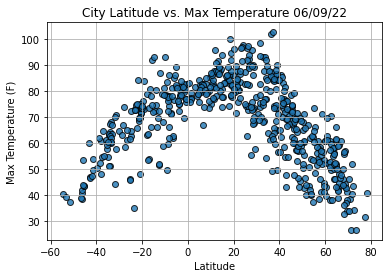

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

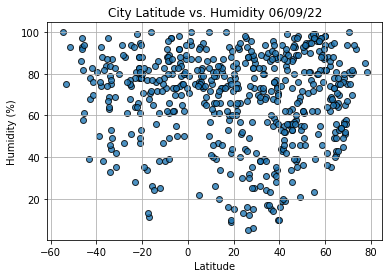

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


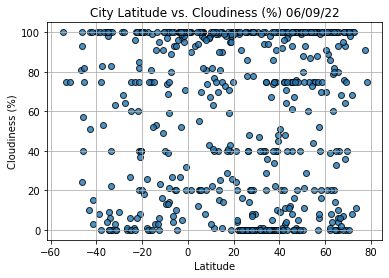

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

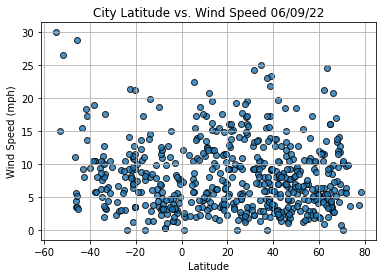

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()